<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/causal-inference/dowhy_conditional_treatment_effects_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Conditional Average Treatment Effect (CATE)

This notebook leverages EconML's CATE estimation using different methods.

We will follow the typical doWhy workflow: model, identify, estimate, and refute.

## Setup Dependencies

In [2]:
# !sudo apt install graphviz libgraphviz-dev graphviz-dev pkg-config -y -q

# !pip install -q pygraphviz --install-option="--include-path=/usr/include/graphviz" \
# --install-option="--library-path=/usr/lib/graphviz/"
# !pip install -q dowhy

Reading package lists...
Building dependency tree...
Reading state information...
pkg-config is already the newest version (0.29.1-0ubuntu2).
graphviz is already the newest version (2.40.1-2).
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 25 not upgraded.
/usr/local/lib/python3.6/dist-packages/pip/_internal/commands/install.py:283: UserWarning: Disabling all use of wheels due to the use of --build-options / --global-options / --install-options.
  cmdoptions.check_install_build_global(options)
     |████████████████████████████████| 71kB 3.0MB/s 
     |████████████████████████████████| 286kB 15.1MB/s 
     |████████████████████████████████| 5.6MB 21.6MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
ERROR: econml 0.6.1 has requirement matplotlib<3.1, but you'll have matplotlib 3.1.

In [15]:
import numpy as np
import pandas as pd
import logging

import dowhy
import dowhy.datasets

from IPython.display import Image
from IPython.display import display
from dowhy import CausalModel

import econml
import warnings
warnings.filterwarnings('ignore')

print(dowhy.__version__)

0.2


In [8]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                     num_instruments=2, num_effect_modifiers=2,
                                     num_treatments=1,
                                     treatment_is_binary=False)
df = data['df']
df.head()

,X0,X1,Z0,Z1,W0,W1,W2,W3,v0,y
0,0.548173,-2.277827,1.0,0.082832,1.268371,-0.505840,0.159907,0.836928,14.943959,22.755068
1,-0.148562,-0.973063,1.0,0.778443,0.429888,-0.962348,0.632522,0.311240,17.875651,101.200192
2,-2.030298,-0.827340,1.0,0.867969,0.192098,-0.299542,0.001500,-1.839095,12.552756,30.525856
3,-0.548583,0.890505,1.0,0.450028,3.862704,-0.347325,0.552876,0.931117,23.150643,312.346588
4,-0.063283,-0.571449,1.0,0.972587,0.923954,0.739621,2.514735,1.166645,33.854449,259.399519


In [13]:
model = CausalModel(data=data['df'],
                    treatment=data['treatment_name'], 
                    outcome=data['outcome_name'],
                    graph=data['gml_graph'])

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']


INFO:dowhy.causal_graph:Using Matplotlib for plotting


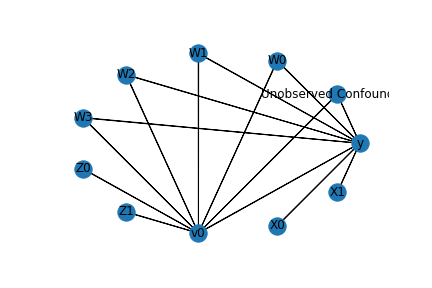

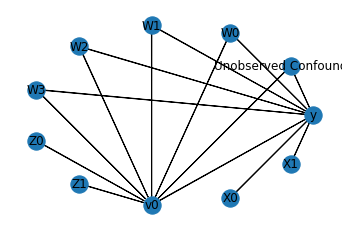

In [17]:
model.view_model()
display(Image(filename='causal_model.png'))